# Purpose

- I want to predict how much a movie will make in theaters worldwide. The purpose is to understand what factors (such as genre and number of theaters) are correlated with the total gross amount.
- Movie makers can benfit from this model because it will inform which aspects of the process may be crucially related to the overall yield. Actors may also benefit if they are deciding whether or not to participate in the film. Investors may also benefit from being able to predict which movies might be worth putting money into.

# Data

- This data is scraped from [Box Office Mojo](https://www.boxofficemojo.com/year/2021/?grossesOption=calendarGrosses) and contains information about various movies from 2012-2021.
- An individual sample is a singular movie (a row in the dataframe) and characteristics include Worldwide Gross, Distributor, Budget, MPAA, Running Time, Genres, Number of Theaters, Release Month, and Release Year (columns in the dataframe).
- The predicted target for modeling is the Worldwide Gross amount.

# Import Required Packages

In [1]:
import requests, bs4
from bs4 import BeautifulSoup as bs
from time import sleep
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import warnings;
warnings.filterwarnings("ignore");
sns.set_theme()

# Web Scraping Functions

In [2]:
# write a function to generate the links
def find_links(year):
    # get HTML code for the page with year of choice
    url = "https://www.boxofficemojo.com/year/" + str(year) + "/?grossesOption=calendarGrosses"
    response = requests.get(url)
    soup = bs(response.text)
    
    # find the website URL's for all 200 movies on this page
    links = soup.find_all(class_="a-text-left mojo-field-type-release mojo-cell-wide")
    websites = ["https://www.boxofficemojo.com" + i.next["href"] for i in links]
    
    return websites

In [3]:
# write a function to collect movie information
def get_details(web_links):
    data = []
    count = 0
    for url in web_links:
        # create periodic pauses
        if count % 20 == 0:
            sleep(4)
            
        # get the HTML code for each website in the list
        response = requests.get(url)
        soup = bs(response.text)
        
        # try to acquire details from this page, otherwise skip
        try:
            title = soup.find(class_="a-size-extra-large").text
        except:
            title = None
        try:
            world = int(soup.find_all(class_="a-size-small")[2].parent.find(class_="money").text
                        .replace("$","").replace(",",""))
        except:
            world = None
        try:
            distrib = soup.find(text="Distributor").next.text
            extra_bit = soup.find(text="Distributor").next.find(class_="a-size-small a-link-normal").text
            distrib = distrib.replace(extra_bit, "")
        except:
            try:
                distrib = soup.find(text="Distributor").next.text
            except:
                distrib = None
        try:
            budget = int(soup.find(text="Budget").next.text.replace("$","").replace(",",""))
        except:
            budget = None
        if soup.find(text="Release Date"):
            try:
                release = pd.to_datetime(soup.find(text="Release Date").next.text)
            except:
                try:
                    release = pd.to_datetime(soup.find(text="Release Date").next.text.split("\n            ")[0])
                except:
                    release = None
        else:
            try:
                release = pd.to_datetime(soup.find(text="Release Date\n        \n            (Wide)")
                                         .next.text.split(" (")[0])
            except:
                release = None
        try:
            mpaa = soup.find(text="MPAA").next.text
        except:
            mpaa = None
        try:
            run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%H hr %M min")
            run_time -= datetime.datetime.strptime("00:00", "%H:%M")
        except:
            try:
                run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%H hr")
                run_time -= datetime.datetime.strptime("00:00", "%H:%M")
            except:
                try:
                    run_time = datetime.datetime.strptime(soup.find(text="Running Time").next.text, "%M min")
                    run_time -= datetime.datetime.strptime("00:00", "%H:%M")
                except:
                    run_time = None
        try:
            genre = soup.find(text="Genres").next.text.replace("\n    ", "").replace("   ","")
        except:
            genre = None
        try:
            days = int(soup.find(text="In Release").next.text.split()[0].replace(",",""))
        except:
            days = None
        try:
            theaters = int(soup.find(text="Widest Release").next.text.split()[0].replace(",",""))
        except:
            try:
                theaters = int(soup.find(text="Opening").next.next.next.next.next
                               .replace("\n            theaters", "").replace(",",""))
            except:
                theaters = None
        try:
            rank = int(soup.find("td").parent.find(class_="a-text-right mojo-field-type-rank").text)
        except:
            rank = None
        
        # create a dictionary with this information
        my_dict = {"Movie Title":title, "Worldwide Gross":world, "Distributor":distrib, "Budget": budget,
                   "Release Date":release, "MPAA":mpaa, "Running Time": run_time, "Genres":genre,
                   "Days In Release": days, "Number of Theaters":theaters, "Rank on First Day":rank}
        # add each dictionary to a list
        data.append(my_dict)
        
        count += 1
    
    # return a pandas dataframe made from the list
    return pd.DataFrame(data)

# Collect Data

### 2012 Data

In [4]:
# create a dataframe with 2012 movies
#df_2012 = get_details(find_links(2012))

In [5]:
# save in a pickle file
#with open("df_2012.pickle", "wb") as file:
#    pickle.dump(df_2012, file)

### 2013 Data

In [6]:
# create a dataframe with 2013 movies
#df_2013 = get_details(find_links(2013))

In [7]:
# save in a pickle file
#with open("df_2013.pickle", "wb") as file:
#    pickle.dump(df_2013, file)

### 2014 Data

In [8]:
# create a dataframe with 2014 movies
#df_2014 = get_details(find_links(2014))

In [9]:
# save in a pickle file
#with open("df_2014.pickle", "wb") as file:
#    pickle.dump(df_2014, file)

### 2015 Data

In [10]:
# create a dataframe with 2015 movies
#df_2015 = get_details(find_links(2015))

In [11]:
# save in a pickle file
#with open("df_2015.pickle", "wb") as file:
#    pickle.dump(df_2015, file)

### 2016 Data

In [12]:
# create a dataframe with 2016 movies
#df_2016 = get_details(find_links(2016))

In [13]:
# save in a pickle file
#with open("df_2016.pickle", "wb") as file:
#    pickle.dump(df_2016, file)

### 2017 Data

In [14]:
# create a dataframe with 2017 movies
#df_2017 = get_details(find_links(2017))

In [15]:
# save in a pickle file
#with open("df_2017.pickle", "wb") as file:
#    pickle.dump(df_2017, file)

### 2018 Data

In [16]:
# create a dataframe with 2018 movies
#df_2018 = get_details(find_links(2018))

In [17]:
# save in a pickle file
#with open("df_2018.pickle", "wb") as file:
#    pickle.dump(df_2018, file)

### 2019 Data

In [18]:
# create a dataframe with 2019 movies
#df_2019 = get_details(find_links(2019))

In [19]:
# save in a pickle file
#with open("df_2019.pickle", "wb") as file:
#    pickle.dump(df_2019, file)

### 2020 Data

In [20]:
# create a dataframe with 2020 movies
#df_2020 = get_details(find_links(2020))

In [21]:
# save in a pickle file
#with open("df_2020.pickle", "wb") as file:
#    pickle.dump(df_2020, file)

### 2021 Data

In [22]:
# create a dataframe with 2021 movies
#df_2021 = get_details(find_links(2021))

In [23]:
# save in a pickle file
#with open("df_2021.pickle", "wb") as file:
#    pickle.dump(df_2021, file)

# Combine and Clean Data

In [24]:
# read in the data saved from each year
data_list = []
for i in range(2012, 2022):
    with open("df_" + str(i) + ".pickle", "rb") as file:
        data_list.append(pickle.load(file))

In [25]:
# combine dataframes together, remove prior to 2012, and sort by Release Date
complete_df = pd.concat(data_list)
complete_df = complete_df[complete_df["Release Date"].dt.year > 2011]
complete_df = complete_df.sort_values("Release Date")

In [26]:
# drop some of the unnecessary columns
complete_df.drop(columns=["Movie Title", "Days In Release", "Rank on First Day"], inplace=True)

In [27]:
# drop duplicates and NA values, then reset the index
complete_df.drop_duplicates(inplace=True)
complete_df = complete_df.dropna()
complete_df = complete_df.set_index(pd.Series(range(len(complete_df))))
complete_df.head()

,Worldwide Gross,Distributor,Budget,Release Date,MPAA,Running Time,Genres,Number of Theaters
0,101758490,Paramount Pictures,1000000.0,2012-01-06,R,0 days 01:23:00,Horror,2551.0
1,96262212,Universal Pictures,25000000.0,2012-01-13,R,0 days 01:49:00,Action Crime Drama Thriller,2870.0
2,34513760,Relativity Media,23000000.0,2012-01-20,R,0 days 01:33:00,Action Drama Thriller,2441.0
3,50365498,Twentieth Century Fox,58000000.0,2012-01-20,PG-13,0 days 02:05:00,Action Drama History War,2573.0
4,160112671,Screen Gems,70000000.0,2012-01-20,R,0 days 01:28:00,Action Fantasy Horror Sci-Fi,3078.0


In [28]:
# fix some of the distributor names
complete_df["Distributor"].replace("20th Century Studios", "Twentieth Century Fox", inplace=True)
complete_df["Distributor"].replace("Fox Searchlight Pictures", "Twentieth Century Fox", inplace=True)
complete_df["Distributor"].replace("Sony Pictures Classics", "Sony Pictures", inplace=True)
complete_df["Distributor"].replace("Sony Pictures Entertainment (SPE)", "Sony Pictures", inplace=True)
complete_df["Distributor"].replace("Walt Disney Studios Motion Pictures", "Walt Disney Pictures", inplace=True)

# combine many distributors into an "other" category
extra = complete_df["Distributor"].value_counts()[complete_df["Distributor"].value_counts() <= 10].index
for i in extra:
    complete_df["Distributor"].replace(i, "Other Distributor", inplace=True)

In [29]:
# collect month and year information from Release Date
complete_df["Release Month"] = complete_df["Release Date"].dt.strftime("%b")
complete_df["Release Year"] = complete_df["Release Date"].dt.year.astype(str)
complete_df.drop(columns="Release Date", inplace=True)

In [30]:
# combine G and PG since there are very few G-rated movies
complete_df["MPAA"].replace("G", "G / PG", inplace=True)
complete_df["MPAA"].replace("PG", "G / PG", inplace=True)

In [31]:
# convert the "Running Time" column into minutes (numerical data rather than timedelta)
hours = complete_df["Running Time"].dt.components["hours"]
minutes = complete_df["Running Time"].dt.components["minutes"]
complete_df["Running Time"] = hours*60 + minutes

In [32]:
# create a list of all genres
genres = []
for i in complete_df["Genres"]:
    genres += i.split()

# replace the ones with low counts
extra = np.unique(genres)[np.unique(genres, return_counts=True)[1] <= 10]
for i in extra:
    complete_df["Genres"] = complete_df["Genres"].map(lambda x: x.replace(i, "Other") if i in x.split() else x)

In [33]:
complete_df.head()

,Worldwide Gross,Distributor,Budget,MPAA,Running Time,Genres,Number of Theaters,Release Month,Release Year
0,101758490,Paramount Pictures,1000000.0,R,83,Horror,2551.0,Jan,2012
1,96262212,Universal Pictures,25000000.0,R,109,Action Crime Drama Thriller,2870.0,Jan,2012
2,34513760,Relativity Media,23000000.0,R,93,Action Drama Thriller,2441.0,Jan,2012
3,50365498,Twentieth Century Fox,58000000.0,PG-13,125,Action Drama History War,2573.0,Jan,2012
4,160112671,Screen Gems,70000000.0,R,88,Action Fantasy Horror Sci-Fi,3078.0,Jan,2012


In [34]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 908
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Worldwide Gross     909 non-null    int64  
 1   Distributor         909 non-null    object 
 2   Budget              909 non-null    float64
 3   MPAA                909 non-null    object 
 4   Running Time        909 non-null    int64  
 5   Genres              909 non-null    object 
 6   Number of Theaters  909 non-null    float64
 7   Release Month       909 non-null    object 
 8   Release Year        909 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 71.0+ KB


# Preliminary Graphs

In [35]:
# transform dependent variable
complete_df["Worldwide Gross"] = np.sqrt(complete_df["Worldwide Gross"])

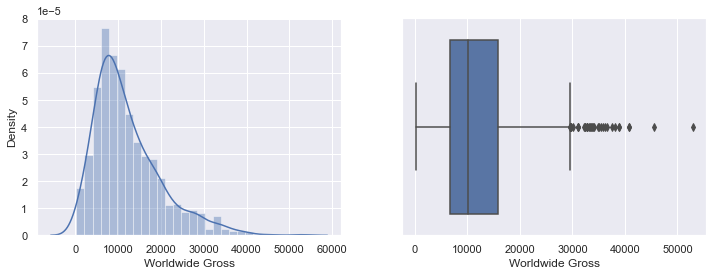

In [36]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(complete_df["Worldwide Gross"])

plt.subplot(1,2,2)
sns.boxplot(complete_df["Worldwide Gross"]);

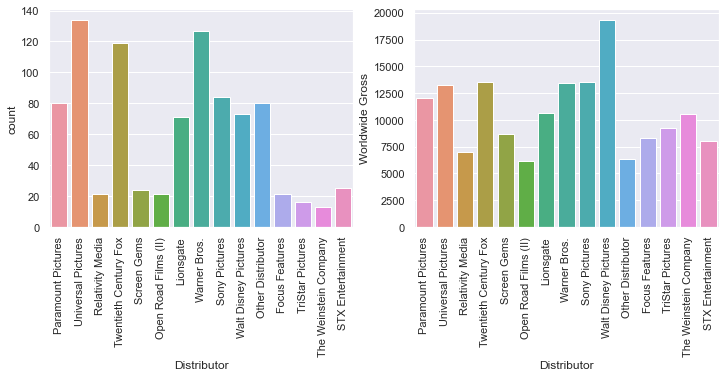

In [37]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Distributor"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Distributor"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");

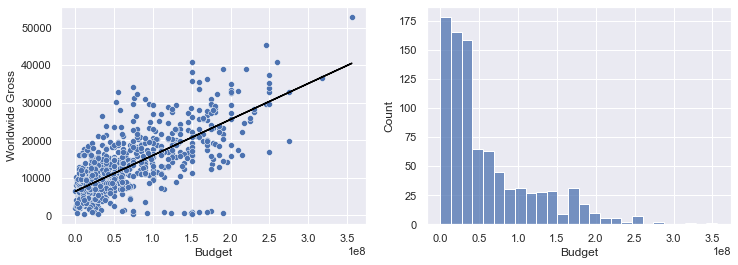

In [38]:
x = complete_df["Budget"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

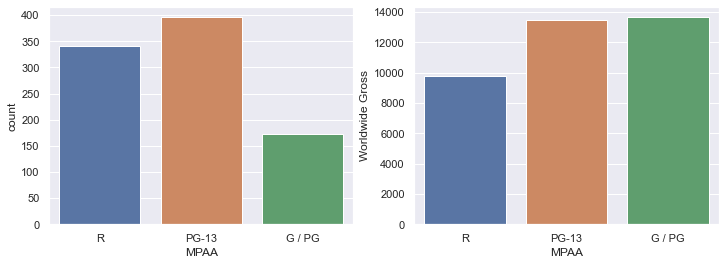

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["MPAA"])

plt.subplot(1,2,2)
sns.barplot(x=complete_df["MPAA"], y=complete_df["Worldwide Gross"], ci=None);

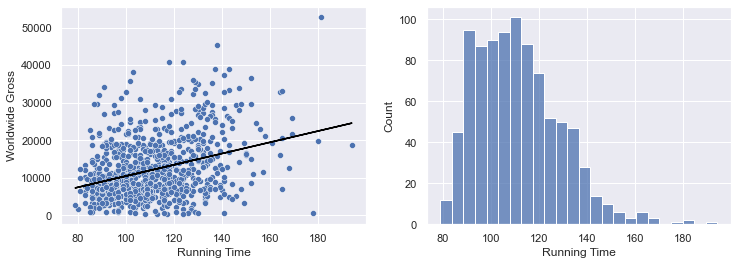

In [40]:
x = complete_df["Running Time"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

In [41]:
# create a list of all genres
genres = []
for i in complete_df["Genres"]:
    genres += i.split()
genres = sorted(genres)
    
# find the averages for each unique genre
averages = []
for i in np.unique(genres):
    mask = complete_df["Genres"].map(lambda x: True if i in x.split() else False)
    averages.append(complete_df["Worldwide Gross"][mask].mean())

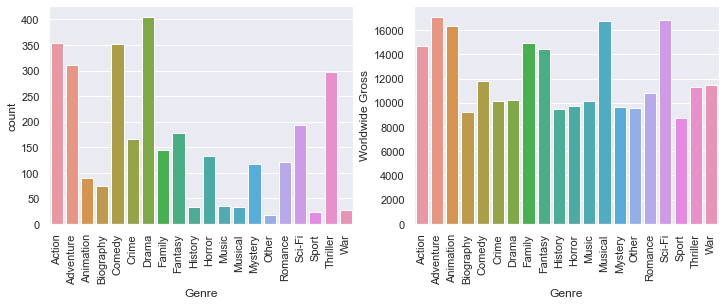

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(genres)
plt.xticks(rotation="vertical")
plt.xlabel("Genre")

plt.subplot(1,2,2)
sns.barplot(x=np.unique(genres), y=averages, ci=None)
plt.xticks(rotation="vertical")
plt.xlabel("Genre")
plt.ylabel("Worldwide Gross");

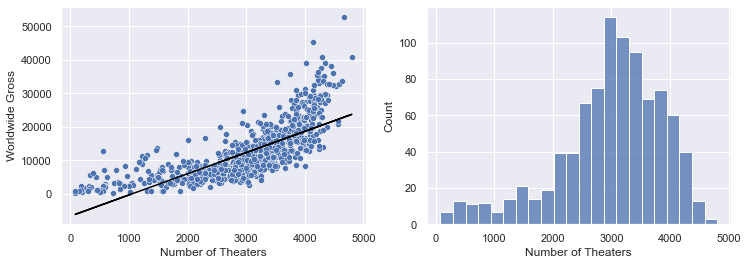

In [43]:
x = complete_df["Number of Theaters"]
y = complete_df["Worldwide Gross"]

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="black")

plt.subplot(1,2,2)
sns.histplot(x);

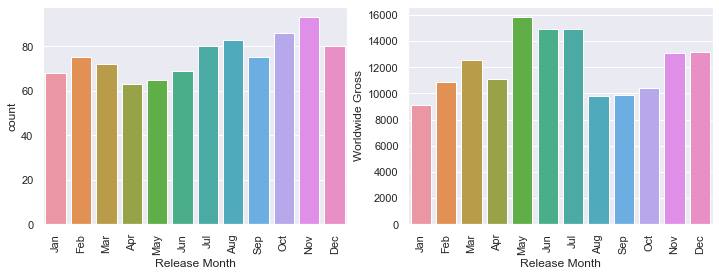

In [44]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Release Month"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Release Month"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");

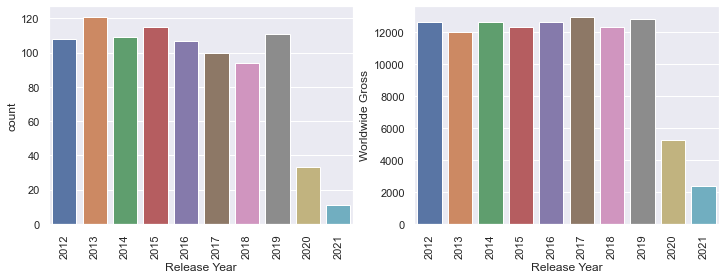

In [45]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(complete_df["Release Year"])
plt.xticks(rotation="vertical")

plt.subplot(1,2,2)
sns.barplot(x=complete_df["Release Year"], y=complete_df["Worldwide Gross"], ci=None)
plt.xticks(rotation="vertical");

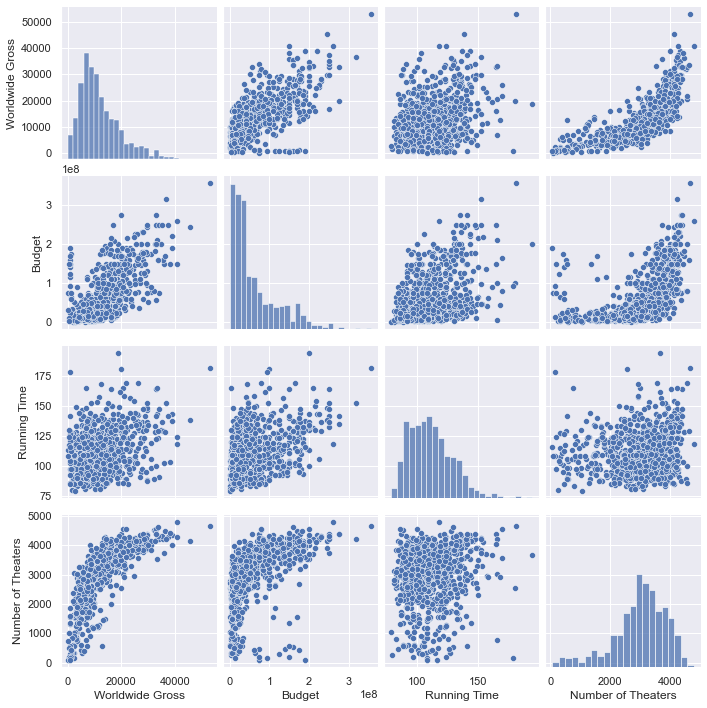

In [46]:
sns.pairplot(complete_df[["Worldwide Gross", "Budget", "Running Time", "Number of Theaters"]]);

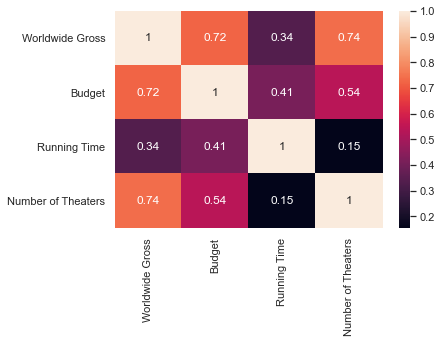

In [47]:
sns.heatmap(complete_df.corr(), annot=True);

# Create Dummy Variables

In [48]:
# create columns for each unique Distributor, removing the first one (Focus Features)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Distributor"], drop_first=True)], axis=1)
complete_df.drop(columns="Distributor", inplace=True)

In [49]:
# create columns for each unique MPAA, removing the first one (G / PG)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["MPAA"], drop_first=True)], axis=1)
complete_df.drop(columns="MPAA", inplace=True)

In [50]:
# create columns for each unique Genre, removing the first one (Action)
genres = np.unique([j for i in complete_df["Genres"].unique() for j in i.split()])[1:]
for i in genres:
    complete_df[i] = complete_df["Genres"].map(lambda x: 1 if i in x.split() else 0)
complete_df.drop(columns="Genres", inplace=True)

In [51]:
# create columns for each unique Release Month, removing the first one (April)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Release Month"], drop_first=True)], axis=1)
complete_df.drop(columns="Release Month", inplace=True)

In [52]:
# create columns for each unique Release Year, removing the first one (2012)
complete_df = pd.concat([complete_df, pd.get_dummies(complete_df["Release Year"], drop_first=True)], axis=1)
complete_df.drop(columns="Release Year", inplace=True)

# Linear Regression Models

In [53]:
# pick out the columns that show significant p-values
cols = ["Worldwide Gross", "Budget", "Running Time", "Number of Theaters", "Open Road Films (II)",
        "Universal Pictures", "Walt Disney Pictures", "Animation", "Family", "Fantasy", "Music", "Musical",
        "Sport", "2020", "2021"]
df = complete_df[cols]

### Ordinary Least Squares

In [54]:
# start with Ordinary Least Squares to get a look at the Linear Regression model
model = sm.OLS(df["Worldwide Gross"], sm.add_constant(df.drop(columns="Worldwide Gross")))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Worldwide Gross   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          1.11e-248
Time:                        18:56:26   Log-Likelihood:                -8829.1
No. Observations:                 909   AIC:                         1.769e+04
Df Residuals:                     894   BIC:                         1.776e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7715.7041   1141.178     -6.761      0.000   -9955.404   -5476.004
Budget                5.643e-05   3.45e-06     16.369      0.000    4.97e-05    6.32e-05
Running Time            43.9783      9.468      4.645      0.000      25.397      62.559
Number of Theaters       3.8588      0.195     19.814      0.000       3.477       4.241
Open Road Films (II) -1997.1922    898.451     -2.223      0.026   -3760.512    -233.873
Universal Pictures    1632.4233    387.083      4.217      0.000     872.725    2392.121
Walt Disney Pictures  1998.2553    571.349      3.497      0.000     876.914    3119.597
Animation             3067.9229    683.238      4.490      0.000    1726.985    4408.861
Family               -1322.7693    602.418     -2.196      0.028   -2505.087    -140.452
Fantasy              -1235.6559    401.692     -3.076      0.002   -2024.026    -447.286
Music                 1859.3821    698.131      2.663      0.008     489.215    3229.549
Musical               1775.2319    762.745      2.327      0.020     278.252    3272.211
Sport                -2150.3949    873.097     -2.463      0.014   -3863.953    -436.837
2020                 -4556.9394    750.108     -6.075      0.000   -6029.117   -3084.762
2021                 -4316.5696   1318.502     -3.274      0.001   -6904.289   -1728.850
==============================================================================
Omnibus:                       77.656   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.603
Skew:                           0.630   Prob(JB):                     1.76e-26
Kurtosis:                       4.243   Cond. No.                     8.53e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

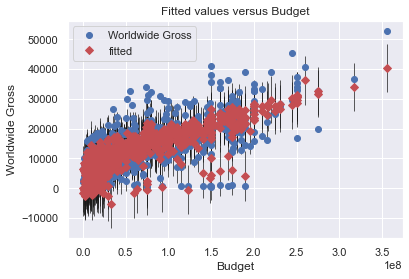

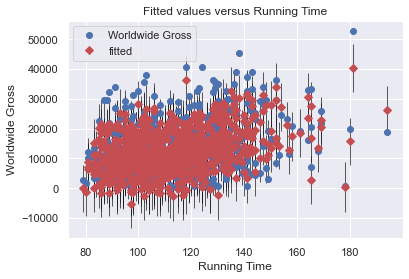

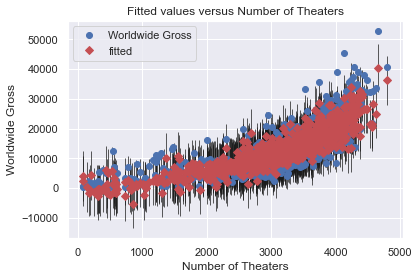

In [55]:
for i in [1,2,3]:
    fig, ax = plt.subplots()
    fig = sm.graphics.plot_fit(fit, i, ax=ax)

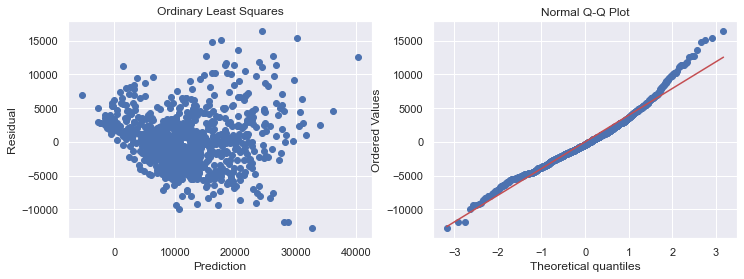

In [56]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(fit.predict(), fit.resid)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Ordinary Least Squares")

plt.subplot(1,2,2)
stats.probplot(fit.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");

In [57]:
print("Mean Squared Error :", mse(df["Worldwide Gross"], fit.predict()))
print("Mean Absolute Error :", mae(df["Worldwide Gross"], fit.predict()))

Mean Squared Error : 15998023.508509671
Mean Absolute Error : 3047.049397952718


### Cross-Validation

In [58]:
def report_scores(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # create the model
    model = LinearRegression()
    fit = model.fit(x_train, y_train)

    # print the results
    print("R² training set :", fit.score(x_train, y_train))
    print("R² test set :", fit.score(x_test, y_test))
    print("")
    print("Mean Squared Error :", mse(y, fit.predict(x)))
    print("Mean Absolute Error :", mae(y, fit.predict(x)))
    print("")
    
    # create a dataframe of the coefficients and the intercept
    results = pd.DataFrame(list(zip(x.columns, fit.coef_)), columns=["Features", "Coefficients"])
    results.loc[-1] = ["Intercept", fit.intercept_]
    results.index += 1
    results = results.sort_index()
    results["Squared"] = results["Coefficients"]**2
    
    # return the data
    return x, y, x_train, x_test, y_train, y_test, fit.predict(x), results

In [59]:
def cv_models(data, test_size=0.2, random_state_1=40, n_splits=10, random_state_2=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x, x_test, y, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state_1)

    # loop through 10 different training and validation sets
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state_2)
    scores_train, scores_val = [], []

    for train_ind, val_ind in kf.split(x, y):
        # create the model
        model = LinearRegression()
        fit = model.fit(x.iloc[train_ind], y.iloc[train_ind])
        
        # append each score to the appropriate list
        scores_train.append(fit.score(x.iloc[train_ind], y.iloc[train_ind]))
        scores_val.append(fit.score(x.iloc[val_ind], y.iloc[val_ind]))

    # print the average results
    print("average R² training set :", np.mean(scores_train))
    print("average R² validation set :", np.mean(scores_val))

### Regularization

In [60]:
def ridge(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state) 
    
    # standardize the data first
    std = StandardScaler()
    std.fit(x_train.values)
    x_tr = std.transform(x_train.values)
    x_te = std.transform(x_test.values)
    
    # loop through the model for a list of lambda values to find the best one
    alphas = 10**np.linspace(-10, 10, 200)
    scores_train, scores_te = [], []

    for a in alphas:
        lr_model_ridge = Ridge(alpha=a)
        lr_model_ridge.fit(x_tr, y_train)
        scores_train.append(lr_model_ridge.score(x_tr, y_train))
        scores_te.append(lr_model_ridge.score(x_te, y_test))

    best_alpha = alphas[scores_te.index(max(scores_te))]

    # plot this process
    plt.scatter(alphas, scores_train, label="train")
    plt.scatter(alphas, scores_te, label="test")
    plt.xlabel("Lambda Values")
    plt.ylabel("R² Scores")
    plt.legend()

    # use that lambda value in Ridge Regression
    lr_model_ridge = Ridge(alpha=best_alpha)
    lr_model_ridge.fit(x_tr, y_train)

    print("R² training set :", lr_model_ridge.score(x_tr, y_train))
    print("R² test set :", lr_model_ridge.score(x_te, y_test))

In [61]:
def lasso(data, test_size=0.2, random_state=40):
    # define x and y
    x = data.drop(columns="Worldwide Gross")
    y = data["Worldwide Gross"]
    
    # split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state) 
    
    # standardize the data first
    std = StandardScaler()
    std.fit(x_train.values)
    x_tr = std.transform(x_train.values)
    x_te = std.transform(x_test.values)
    
    # loop through the model for a list of lambda values to find the best one
    alphas = 10**np.linspace(-10, 10, 200)
    scores_train, scores_te = [], []

    for a in alphas:
        lr_model_lasso = Lasso(alpha=a)
        lr_model_lasso.fit(x_tr, y_train)
        scores_train.append(lr_model_lasso.score(x_tr, y_train))
        scores_te.append(lr_model_lasso.score(x_te, y_test))

    best_alpha = alphas[scores_te.index(max(scores_te))]

    # plot this process
    plt.scatter(alphas, scores_train, label="train")
    plt.scatter(alphas, scores_te, label="test")
    plt.xlabel("Lambda Values")
    plt.ylabel("R² Scores")
    plt.legend()

    # use that lambda value in Ridge Regression
    lr_model_lasso = Lasso(alpha=best_alpha)
    lr_model_lasso.fit(x_tr, y_train)

    print("R² training set :", lr_model_lasso.score(x_tr, y_train))
    print("R² test set :", lr_model_lasso.score(x_te, y_test))

# Model Comparison

In [62]:
# trained based on cross validation
cv_models(df)

average R² training set : 0.7405813279566626
average R² validation set : 0.7210293493843022


R² training set : 0.7330875324958488
R² test set : 0.7306019427304002


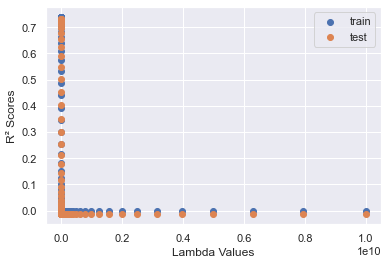

In [63]:
ridge(df)

R² training set : 0.7358195844798285
R² test set : 0.7266791076059826


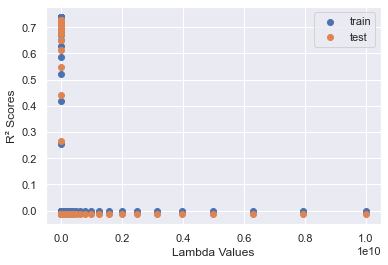

In [64]:
lasso(df)

In [65]:
# reported based on test data set
x, y, x_train, x_test, y_train, y_test, y_pred, results = report_scores(df)
results

R² training set : 0.7399702043986445
R² test set : 0.7221791414372754

Mean Squared Error : 16052250.800428031
Mean Absolute Error : 3052.5837592996995



,Features,Coefficients,Squared
0,Intercept,-7857.746350,6.174418e+07
1,Budget,0.000056,3.174432e-09
2,Running Time,40.930913,1.675340e+03
3,Number of Theaters,4.017704,1.614194e+01
4,Open Road Films (II),-1596.441120,2.548624e+06
5,Universal Pictures,1617.378737,2.615914e+06
6,Walt Disney Pictures,2656.119903,7.054973e+06
7,Animation,3161.738794,9.996592e+06
8,Family,-1701.238735,2.894213e+06
9,Fantasy,-1233.655311,1.521905e+06


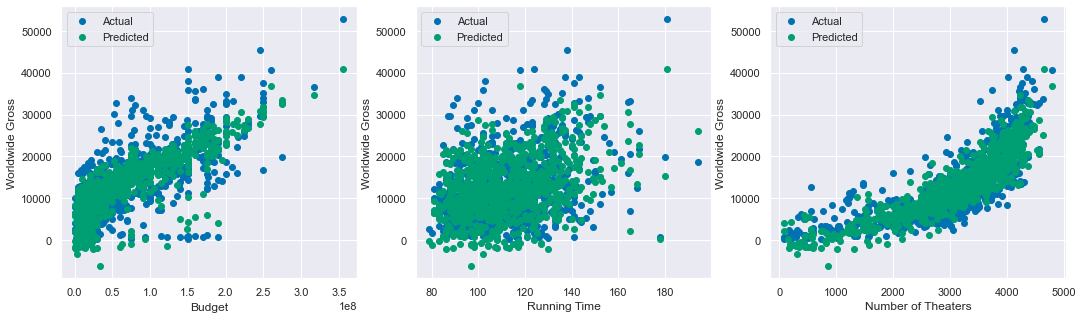

In [66]:
plt.figure(figsize=(18,5))
plt.style.use("seaborn-colorblind")

plt.subplot(1,3,1)
plt.scatter(x["Budget"], y, label="Actual")
plt.scatter(x["Budget"], y_pred, label="Predicted")
plt.xlabel("Budget")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.subplot(1,3,2)
plt.scatter(x["Running Time"], y, label="Actual")
plt.scatter(x["Running Time"], y_pred, label="Predicted")
plt.xlabel("Running Time")
plt.ylabel("Worldwide Gross")
plt.legend()

plt.subplot(1,3,3)
plt.scatter(x["Number of Theaters"], y, label="Actual")
plt.scatter(x["Number of Theaters"], y_pred, label="Predicted")
plt.xlabel("Number of Theaters")
plt.ylabel("Worldwide Gross")
plt.legend();

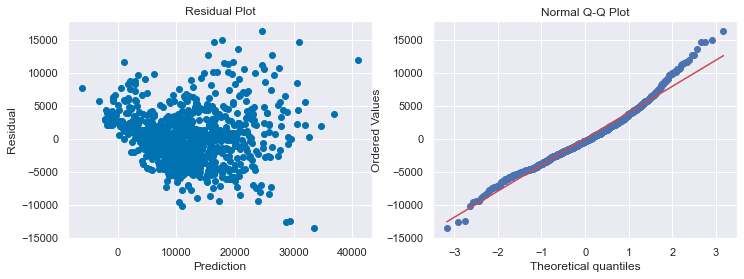

In [67]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(y_pred, y - y_pred)
plt.xlabel("Prediction")
plt.ylabel("Residual")
plt.title("Residual Plot")

plt.subplot(1,2,2)
stats.probplot(y - y_pred, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");

# Results

### Regression Equation

$$\sqrt{WWGross} = -7857.75 + (.000056\cdot Budget) + (40.9309\cdot RunTime) + (4.01770\cdot NumTheaters) - (1596.44\cdot OpenRdFilms) + (1617.38\cdot Universal) + (2656.12\cdot Disney) + (3161.74\cdot Animation) - (1701.24\cdot Family) - (1233.66\cdot Fantasy) + (2178.95\cdot Music) + (1890.15\cdot Musical) - (2033.96\cdot Sport) - (4644.61\cdot Year2020) - (3862.50\cdot Year2021)$$

### Some Statistics

- The R² score on the test data set is 0.7221791414372754 which is decent. This means about 72% of the variation in Worldwide Gross (sqrt transformed) can be explained by the model.
- After performing a square root transformation on Worldwide Gross, the data roughly ranges from 230 to 53000. The mean absolute error is 3052.5837592996995 which is within the first quartile of the data, but still pretty high.

### Interpretation

- Budget, Running Time, Number of Theaters, Distributor, Genre, and Release Year may correlate with Worldwide Gross.
- Increasing Budget, Running Time, and Number of Theaters might correspond to increasing Worldwide Gross. For example, adding just one more theater would theoretically produce a 16.14 dollar profit increase.
- Certain distributors like Universal Pictures and Walt Disney Pictures correlate with higher Worldwide Gross while Open Road Films corresponds with lower Worldwide Gross (compared to Focus Features as the baseline). For example, switching from Focus Features to Walt Disney Pictures would theoretically produce a 7,054,973 dollar profit increase.
- Certain genres such as Animation, Music, and Musical may correspond to higher Worldwide Gross, while others such as Family, Fantasy, and Sport may be lower (compared to Action as the baseline). For example, animating a film would theoretically produce a 9,996,592 dollar profit increase while creating a sports film would theoretically produce a 4,136,976 dollar decrease in profit.
- Worldwide Gross has been lower these past couple years (likely due to COVID). 2020 and 2021 correlate with a decrease in Worldwide Gross compared to 2012 as the baseline. This can't really lead to predictions other than to say that it is better to produce films when we are not in a global pandemic.